In [1]:
############ set-width of the notebook ###############################
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
##########################################################################
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("vector diffusion equation solver")

A sample vector PDE, $$ \begin{equation}
\frac{\partial{\bf{u}}}{\partial{t}}=\alpha\left(\frac{\partial^2{\bf{u}}}{\partial{x^2}}+\hat{z}\times\frac{\partial^2{\bf{u}}}{\partial{y^2}}\right)
\end{equation},
$$
i.e., 
$$ \begin{equation}
\frac{\partial{{u_x}}}{\partial{t}}=\alpha\left(\frac{\partial^2{u_x}}{\partial{x^2}}+\frac{\partial^2{u_y}}{\partial{y^2}}\right)
\end{equation},
$$
and,
$$ \begin{equation}
\frac{\partial{{u_y}}}{\partial{t}}=\alpha\left(\frac{\partial^2{u_y}}{\partial{x^2}}+\frac{\partial^2{u_x}}{\partial{y^2}}\right)
\end{equation},
$$
the maximum value allowed for the solution to be stable is $\Delta t < \Delta t_{max}=\frac{\Delta x^2}{4 \alpha} $

In [8]:
#################### Boundary conditions ############################################
# x-axis details
xlen = 1
nx = 60
delx = xlen/nx
x = np.linspace(-xlen, xlen, nx)

# y-axis details
ylen = 1.5
ny = 60
dely = ylen/ny
y = np.linspace(-ylen, ylen, ny)

# create mesgrid
X, Y = np.meshgrid(x,y)

# time-axis details
max_iter_time = 200
nt = max_iter_time


# coefficients
alpha = .1
delt_max = (delx ** 2)/(4 * alpha)
delt = delt_max/2
print(f"delt/delt_max ={delt/delt_max}, delt_max = {np.round(delt_max, 6)}")

gamma = (alpha * delt) / (delx ** 2)

# Initialize solution: the grid of u(k, i, j)
u1 = np.empty((max_iter_time, nx, ny))
u2 = np.empty((max_iter_time, nx, ny))

# Set the initial condition
u1.fill(.5)
u2.fill(.6)


# Set the boundary conditions for u1
u1[:, :1, :] = 0
u1[:, nx-1:, :] = 100
u1[:, :, :1] = 0
u1[:, :, ny-1:] = 100
# u[0, int(nx/2), int(ny/2)] = u_centre

# Set the boundary conditions for u2
u2[:, :1, :] = 0
u2[:, nx-1:, :] = 100
u2[:, :, :1] = 0
u2[:, :, ny-1:] = 100
# u[0, int(nx/2), int(ny/2)] = u_centre

delt/delt_max =0.5, delt_max = 0.000694


In [4]:
# u1

In [5]:
# Func: define PDE
def calculate(u1, u2, am=.1, cm=.1, lam1me=.1, lam2me=.1, bm=.1, h=1, max_iter_time = nt): 
    u1_tmp = u1.copy()
    u2_tmp = u2.copy()
    itr = 0
    for k in range(0, max_iter_time-1, 1):
#     while itr < maxsteps and diff > convergence :
        for i in range(1, nx-2, 1):
            for j in range(1, ny-2, 1):  
                u10 = u1[k, i, j]
                u20 = u2[k, i, j]
                # calculate the dx's 
                u1x = (1/delx)*(u1[k, i+1, j] - u1[k, i, j])
                u1y = (1/dely)*(u1[k, i, j+1] - u1[k, i, j])
                u2x = (1/delx)*(u2[k, i+1, j] - u2[k, i, j])
                u2y = (1/dely)*(u2[k, i, j+1] - u2[k, i, j])
                # calculate the following dxx's
                u1xx = (1/delx**2)*(u1[k, i+1, j] + u1[k, i-1, j] - 2*u1[k, i, j] )
                u2xx = (1/delx**2)*(u2[k, i+1, j] + u2[k, i-1, j] - 2*u2[k, i, j])  
                # calculate the following dyy's
                u1yy = (1/delx**2)*(u1[k, i, j+1] + u1[k, i, j-1] - 2*u1[k, i, j] )
                u2yy = (1/delx**2)*(u2[k, i, j+1] + u2[k, i, j-1] - 2*u2[k, i, j] )
                ###
                u1[k+1, i, j] = u10 - delt*(u1xx + u2yy)
                u2[k+1, i, j] = u20 - delt*(u2xx + u1yy)             
        diff = np.absolute(u1-u1_tmp)
        itr += 1        
    return u1, u2, itr

In [9]:
# Do the calculation here (Solve PDE!)
u1, u2, itr = calculate(u1,u2)
# u1

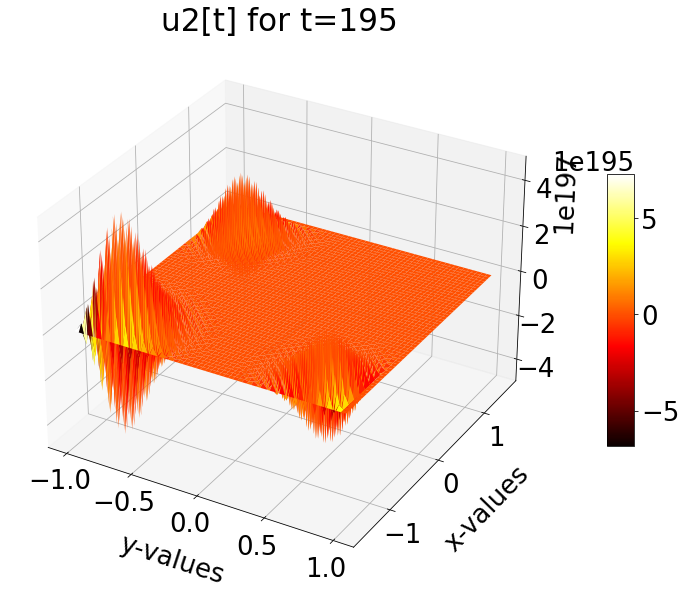

In [11]:
#########################################################################################
from matplotlib import cm

# choose time
time = nt-5
 
# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes(projection ='3d')
plt.rcParams['font.size'] = '26'

# Creating color map
my_cmap = plt.get_cmap('hot')

# Creating plot and colorbar
surf = ax.plot_surface(X, Y, u1[time,:,:], rstride=1, cstride=1,  cmap = my_cmap, edgecolor ='none') 
plt.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10)

ax.set_xlabel("\n\ny-values")
ax.set_ylabel("\n\nx-values")
ax.set_title(f"u2[t] for t={time}")

plt.show()

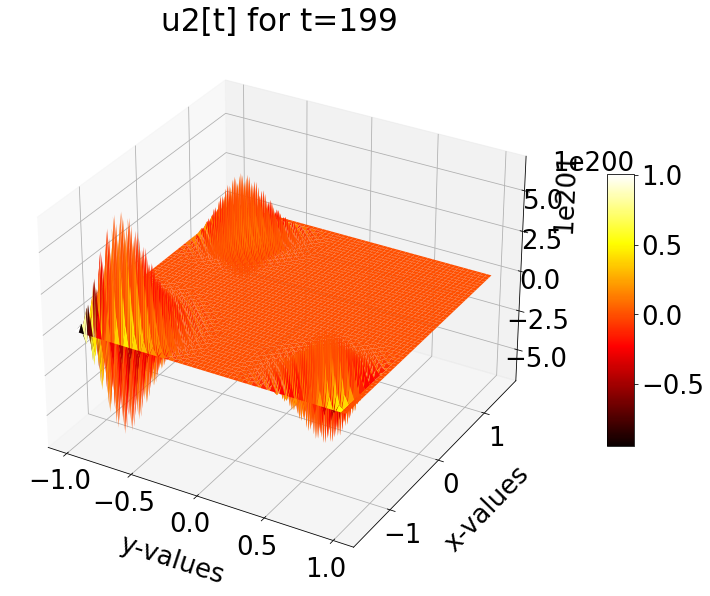

In [12]:
#########################################################################################
from matplotlib import cm


# choose time
time = nt-1

 
# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes(projection ='3d')
plt.rcParams['font.size'] = '26'

# Creating color map
my_cmap = plt.get_cmap('hot')

# Creating plot and colorbar
surf = ax.plot_surface(X, Y, u2[time,:,:], rstride=1, cstride=1,  cmap = my_cmap, edgecolor ='none') 
plt.colorbar(surf, ax = ax, shrink = 0.5, aspect = 10)

ax.set_xlabel("\n\ny-values")
ax.set_ylabel("\n\nx-values")
ax.set_title(f"u2[t] for t={time}")




plt.show()

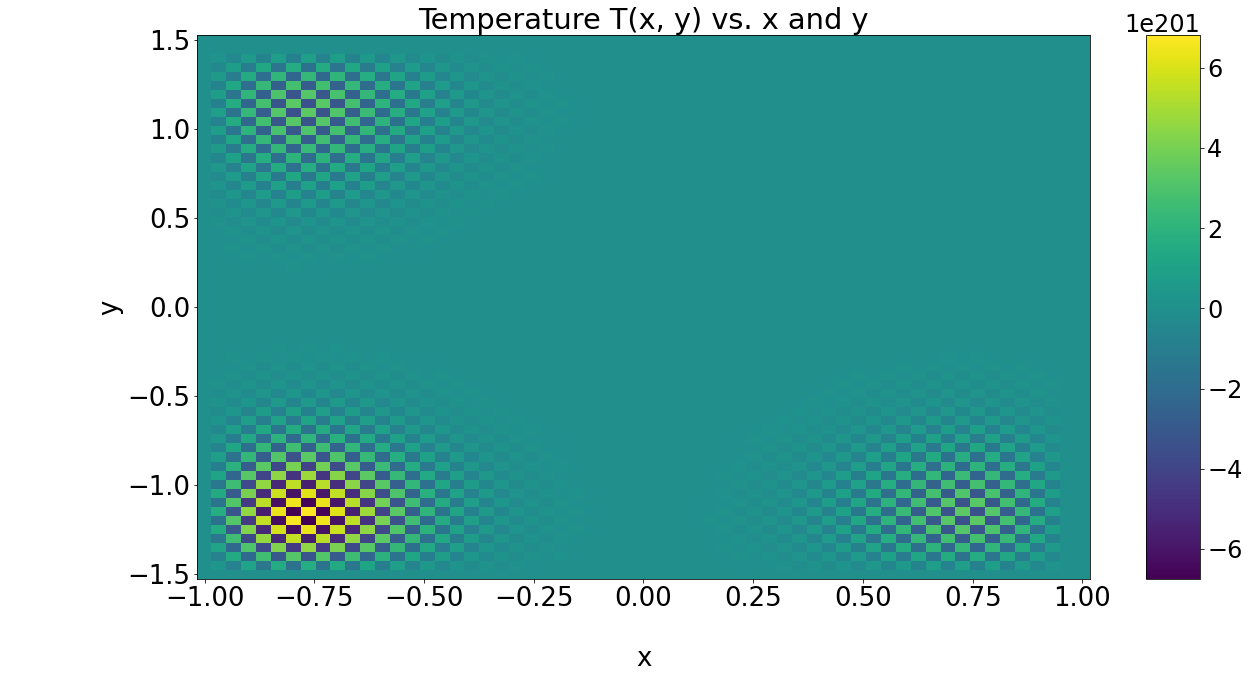

In [13]:
########################### density plot ###########################################################
from matplotlib import pyplot as plt, cm, colors
import numpy as np

# Creating figure and fig-properties
fig = plt.figure(figsize =(20, 10))
ax = plt.axes()
plt.rcParams["figure.autolayout"] = True
plt.rcParams["font.size"] = '24'
 
# Creating color map
my_cmap = plt.get_cmap('hot')

# Creating dataset
Xgrid = X; Ygrid = Y; time = nt - 1
surface = u1[time,:,:]

# Creating plot and colorbar
surf = plt.pcolormesh(Xgrid, Ygrid, u1[time,:,:], shading='auto')
fig.colorbar(surf, ax = ax, shrink = 1.0, aspect = 10)

ax.set_title('Temperature T(x, y) vs. x and y')
ax.set_xlabel("\nx")
ax.set_ylabel("\n\n\ny")

##### plt.savefig('temperature_density_plot_2D.png',facecolor="w", transparent=True, dpi=300)
plt.show()

In [14]:
# plt.quiver(x, y, u1[9, :, :], u2[9, :, :])

In [ ]:
# X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
# U = np.cos(X)
# V = np.sin(Y)

fig2, ax2 = plt.subplots()
ax2.set_title("pivot='mid'; every third arrow; units='inches'")
Q = ax2.quiver(X[::3, ::3], Y[::3, ::3], u1[8, ::3, ::3], u2[8, ::3, ::3],
               pivot='mid', units='inches')
qk = ax2.quiverkey(Q, 0.5, 0.5, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
# ax2.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)